In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [20]:
dfb=pd.read_csv("BCNN_mnist.csv")
bbest=dfb["test_accuracy"].max()
dfb[dfb["test_accuracy"]==bbest]

,Unnamed: 0,epoch,train_loss,test_loss,test_accuracy
50,50,51,0.149748,0.346042,88.23


In [21]:
dfr=pd.read_csv("resnet9_mnist.csv")
dfr
rbest=dfr["test_accuracy"].max()
dfr[dfr["test_accuracy"]==rbest]

,Unnamed: 0,epoch,train_loss,test_loss,test_accuracy
50,50,51,0.106967,0.20817,93.27


In [22]:
dfc=pd.read_csv("standardCNN_mnist.csv")
dfc
cbest=dfc["test_accuracy"].max()
dfc[dfc["test_accuracy"]==cbest]

,Unnamed: 0,epoch,train_loss,test_loss,test_accuracy
32,32,33,0.082349,0.267472,92.25


# Comparision

## Test Accuracy

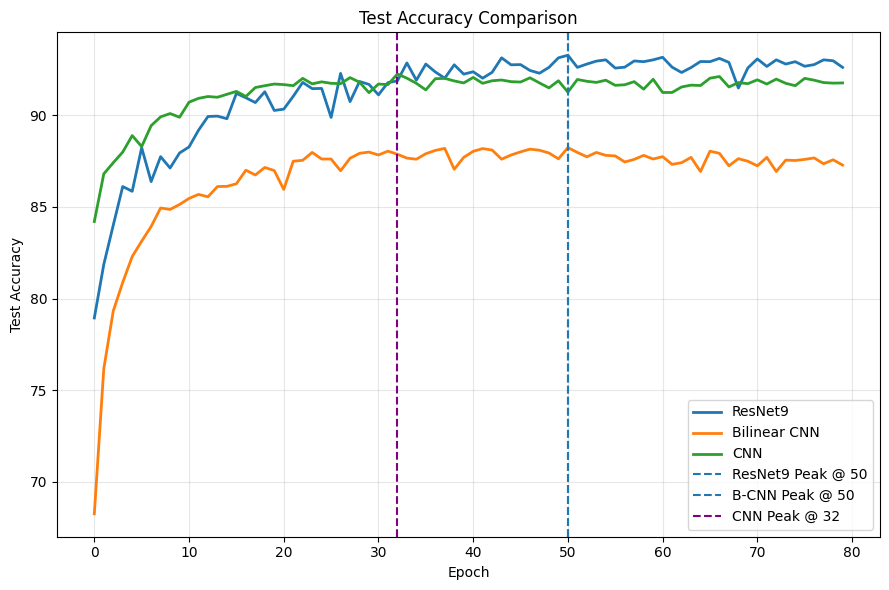

In [23]:
ry=dfr["test_accuracy"]
by=dfb["test_accuracy"]
cy=dfc["test_accuracy"]
max_r = ry.max()
max_r_epoch = ry.idxmax()

max_b = by.max()
max_b_epoch = by.idxmax()

max_c = cy.max()
max_c_epoch = cy.idxmax()

# Plot accuracy curves
plt.figure(figsize=(9, 6))
plt.plot(ry, label="ResNet9", linewidth=2)
plt.plot(by, label="Bilinear CNN", linewidth=2)
plt.plot(cy, label="CNN", linewidth=2)

# Vertical lines at max accuracy epochs
plt.axvline(max_r_epoch, linestyle="--", linewidth=1.5, label=f"ResNet9 Peak @ {max_r_epoch}")
plt.axvline(max_b_epoch, linestyle="--", linewidth=1.5, label=f"B-CNN Peak @ {max_b_epoch}")
plt.axvline(max_c_epoch, linestyle="--", linewidth=1.5, color="purple",label=f"CNN Peak @ {max_c_epoch}")

plt.xlabel("Epoch")
plt.ylabel("Test Accuracy")
plt.title("Test Accuracy Comparison")

plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Loss

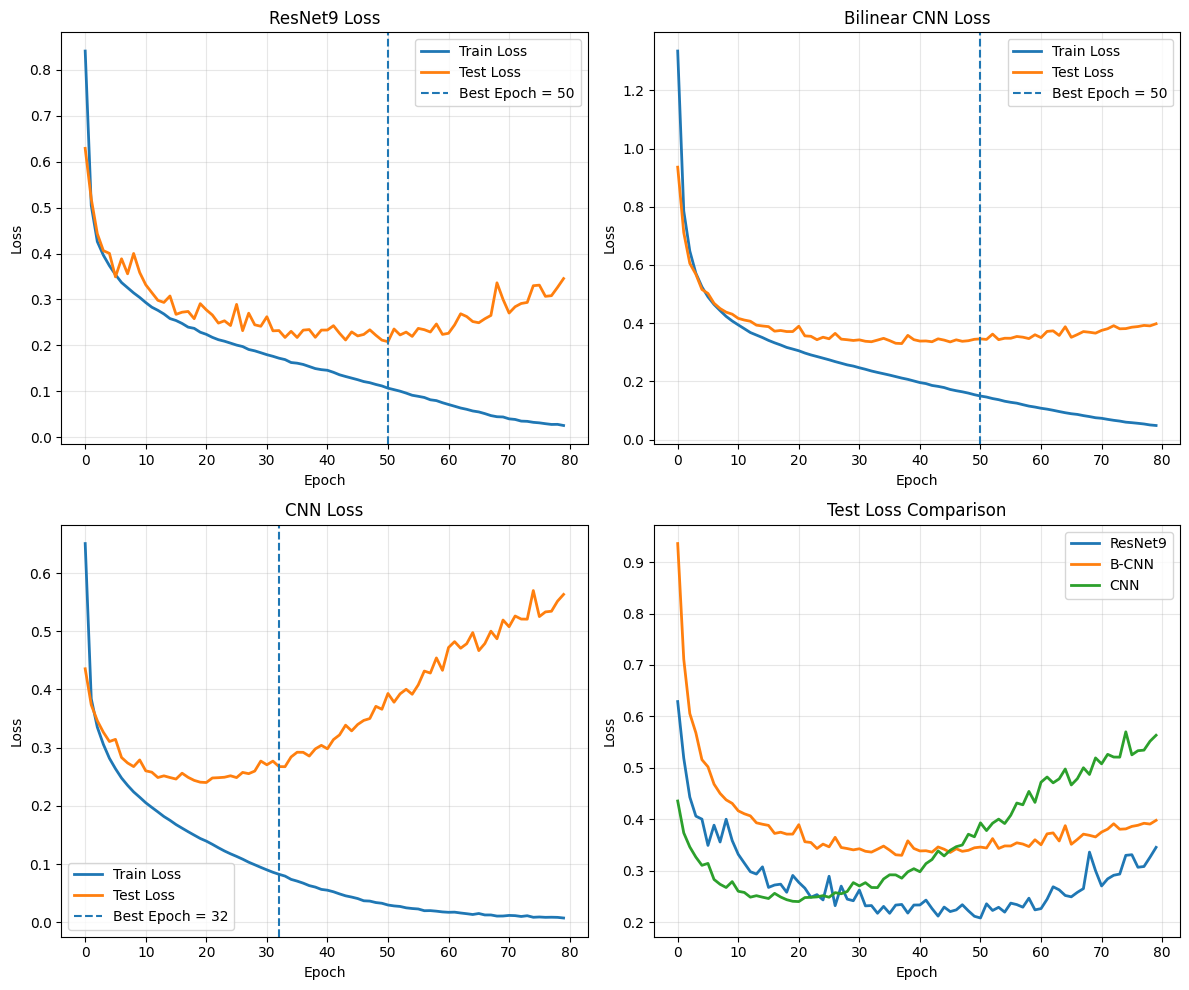

In [24]:
r_train, r_test = dfr["train_loss"], dfr["test_loss"]
b_train, b_test = dfb["train_loss"], dfb["test_loss"]
c_train, c_test = dfc["train_loss"], dfc["test_loss"]
r_best = ry.idxmax()
b_best = by.idxmax()
c_best = cy.idxmax()

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# ResNet9
axes[0, 0].plot(r_train, label="Train Loss", linewidth=2)
axes[0, 0].plot(r_test, label="Test Loss", linewidth=2)
axes[0, 0].axvline(r_best, linestyle="--", linewidth=1.5,
                   label=f"Best Epoch = {r_best}")
axes[0, 0].set_title("ResNet9 Loss")
axes[0, 0].set_xlabel("Epoch")
axes[0, 0].set_ylabel("Loss")
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# B-CNN
axes[0, 1].plot(b_train, label="Train Loss", linewidth=2)
axes[0, 1].plot(b_test, label="Test Loss", linewidth=2)
axes[0, 1].axvline(b_best, linestyle="--", linewidth=1.5,
                   label=f"Best Epoch = {b_best}")
axes[0, 1].set_title("Bilinear CNN Loss")
axes[0, 1].set_xlabel("Epoch")
axes[0, 1].set_ylabel("Loss")
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)


# CNN: Train vs Test Loss
axes[1, 0].plot(c_train, label="Train Loss", linewidth=2)
axes[1, 0].plot(c_test, label="Test Loss", linewidth=2)
axes[1, 0].axvline(c_best, linestyle="--", linewidth=1.5,
                   label=f"Best Epoch = {c_best}")
axes[1, 0].set_title("CNN Loss")
axes[1, 0].set_xlabel("Epoch")
axes[1, 0].set_ylabel("Loss")
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)


# All Models
axes[1, 1].plot(r_test, label="ResNet9", linewidth=2)
axes[1, 1].plot(b_test, label="B-CNN", linewidth=2)
axes[1, 1].plot(c_test, label="CNN", linewidth=2)
axes[1, 1].set_title("Test Loss Comparison")
axes[1, 1].set_xlabel("Epoch")
axes[1, 1].set_ylabel("Loss")
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()